In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import sys

sys.path.insert(1, '..')
from check_data_consistency import DataConsistencyChecker

In [2]:
# This notebook provides some examples of patterns and discovered in datasets
# on OpenML. For most datasets, at least one pattern of some interest can usually
# be found. In some cases, we include two or more here, but we mostly stick to
# one to keep the size of the notebook down, because not all patterns found
# are interesting, some are similar to other patterns, and the number of patterns
# found that are interesting is quite large. 

# We limit each test to one example as well. 

In [3]:
def demo_test(filename, test_id_arr, issue_id_arr=None):
    
    # Load the data
    data = fetch_openml(filename, version=1)
    df = pd.DataFrame(data.data, columns=data.feature_names)
    display(df.head())
    
    # Run DataConsistencyChecker with default parameters, other than verbose=0
    # to skip printing the test IDs as the tests exectute. 
    dc = DataConsistencyChecker(verbose=0)  
    dc.init_data(df)
    _ = dc.check_data_quality(execute_list=test_id_arr)
    
    # If specific issues are specified, list only these.
    if issue_id_arr is not None:
        dc.display_detailed_results(issue_id_list=issue_id_arr)
    else:
        dc.display_detailed_results(test_id_list=test_id_arr)

In [ ]:
demo_test("abalone", test_id_arr=['LARGER_THAN_SUM', 'LARGER', 'SIMILAR_WRT_RATIO'], issue_id_arr=[9, 0, 1, 2, 8])

In [ ]:
demo_test("adult", test_id_arr=['LARGE_GIVEN_PAIR'], issue_id_arr=[15])

In [ ]:
demo_test("musk", test_id_arr=['LARGE_GIVEN_PREFIX', 'LINEAR_REGRESSION'])

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V24,V25,V26,V27,V28,V29,V30,V31,V32,V33
0,42.0,50.0,270900.0,270944.0,267.0,17.0,44.0,24220.0,76.0,108.0,...,1.6435,0.8182,-0.2913,0.5822,1.0,0.0,0.0,0.0,0.0,0.0
1,645.0,651.0,2538079.0,2538108.0,108.0,10.0,30.0,11397.0,84.0,123.0,...,1.4624,0.7931,-0.1756,0.2984,1.0,0.0,0.0,0.0,0.0,0.0
2,829.0,835.0,1553913.0,1553931.0,71.0,8.0,19.0,7972.0,99.0,125.0,...,1.2553,0.6667,-0.1228,0.2150,1.0,0.0,0.0,0.0,0.0,0.0
3,853.0,860.0,369370.0,369415.0,176.0,13.0,45.0,18996.0,99.0,126.0,...,1.6532,0.8444,-0.1568,0.5212,1.0,0.0,0.0,0.0,0.0,0.0
4,1289.0,1306.0,498078.0,498335.0,2409.0,60.0,260.0,246930.0,37.0,126.0,...,2.4099,0.9338,-0.1992,1.0000,1.0,0.0,0.0,0.0,0.0,0.0



Data consistency check complete.
Analysed 1,941 rows, 33 columns
Executed 3 tests.

Patterns without Exceptions:
Found 3 patterns without exceptions
2 tests (66.67% of tests) identified at least one pattern without exceptions each. 
By default some patterns are not listed in calls to display_detailed_results().

Patterns with Exceptions:
Found 2 patterns with exceptions
1 tests (33.33% of tests) flagged at least one exception each.
Flagged 1 row(s) with at least one exception.
Flagged 3 column(s) with at least one exception.



Displaying results for tests: 'RARE_PAIRS', 'CONSTANT_RATIO', 'DECISION_TREE_CLASSIFIER'

### RARE_PAIRS

### Column(s): "V12" AND "V30"

**Issue ID**: 0

A strong pattern, and exceptions to the pattern, were found.


**Description**: Rare combinations of values were found, [(1.0, 1.0)].

**Number of exceptions**: 1 (0.0515% of rows)

**Examples of values NOT flagged**:

,V12,V30
148,0.0,0.0
215,1.0,0.0
437,0.0,1.0
705,0.0,1.0
727,0.0,1.0
769,0.0,0.0
814,0.0,0.0
1159,1.0,0.0
1424,1.0,0.0
1611,1.0,0.0


**Flagged values**:

,V12,V30
390,1.0,1.0


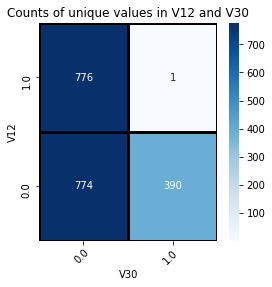

### Column(s): "V13" AND "V30"

**Issue ID**: 1

A strong pattern, and exceptions to the pattern, were found.


**Description**: Rare combinations of values were found, [(0.0, 1.0)].

**Number of exceptions**: 1 (0.0515% of rows)

**Examples of values NOT flagged**:

,V13,V30
148,1.0,0.0
215,0.0,0.0
437,1.0,1.0
705,1.0,1.0
727,1.0,1.0
769,1.0,0.0
814,1.0,0.0
1159,0.0,0.0
1424,0.0,0.0
1611,0.0,0.0


**Flagged values**:

,V13,V30
390,0.0,1.0


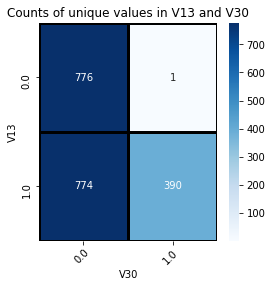

### CONSTANT_RATIO

### Column(s): "V3" AND "V4"

Pattern found (without exceptions)

**Description**:

The ratio of "V3" and "V4" is consistently close to 0.9999758472643326



**Examples**:

,V3,V4,DIVISION RESULTS
148,12917033.0,12917094.0,0.999995
215,923170.0,923211.0,0.999956
436,1206989.0,1207040.0,0.999958
704,4401486.0,4401544.0,0.999987
726,115072.0,115195.0,0.998932
768,273908.0,273912.0,0.999985
813,68445.0,68506.0,0.999110
1158,961065.0,961092.0,0.999972
1423,1038876.0,1038891.0,0.999986
1611,2887288.0,2887307.0,0.999993


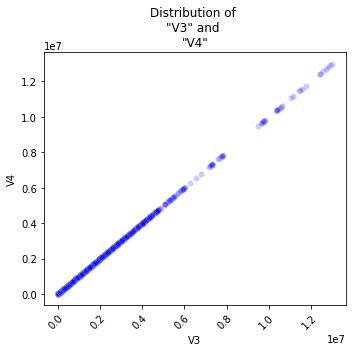

### DECISION_TREE_CLASSIFIER

### Column(s): "V13" AND "V12"

Pattern found (without exceptions)

**Description**:

The values in column "V12" are consistently predictable from ['V13'] based using a decision tree with the following rules: 
|--- V13 <= 0.50
|   |--- class: 1.0
|--- V13 >  0.50
|   |--- class: 0.0




**Examples**:

,V13,V12,PREDICTION
0,0.0,1.0,1.0
1,0.0,1.0,1.0
2,0.0,1.0,1.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0
5,1.0,0.0,0.0
6,1.0,0.0,0.0
7,1.0,0.0,0.0
44,0.0,1.0,1.0
45,0.0,1.0,1.0


### Column(s): "V12" AND "V13"

Pattern found (without exceptions)

**Description**:

The values in column "V13" are consistently predictable from ['V12'] based using a decision tree with the following rules: 
|--- V12 <= 0.50
|   |--- class: 1.0
|--- V12 >  0.50
|   |--- class: 0.0




**Examples**:

,V12,V13,PREDICTION
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,1.0,1.0
4,0.0,1.0,1.0
5,0.0,1.0,1.0
6,0.0,1.0,1.0
7,0.0,1.0,1.0
44,1.0,0.0,0.0
45,1.0,0.0,0.0


In [4]:
demo_test("steel-plates-fault", 
          test_id_arr=['RARE_PAIRS', 'CONSTANT_RATIO', 'DECISION_TREE_CLASSIFIER'])

In [ ]:
demo_test("speeddating", 
          test_id_arr=['CHARS_PATTERN', 'COLUMN_ORDERED_ASC', 'SIMILAR_PREVIOUS', 
                       'DECISION_TREE_CLASSIFIER', 'SAME_SPECIAL_CHARS'])

,has_null,wave,gender,age,age_o,d_age,d_d_age,race,race_o,samerace,...,expected_num_interested_in_me,expected_num_matches,d_expected_happy_with_sd_people,d_expected_num_interested_in_me,d_expected_num_matches,like,guess_prob_liked,d_like,d_guess_prob_liked,met
0,0,1.0,female,21.0,27.0,6.0,[4-6],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0
1,0,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,5.0,[6-8],[5-6],1.0
2,1,1.0,female,21.0,22.0,1.0,[0-1],Asian/Pacific Islander/Asian-American,Asian/Pacific Islander/Asian-American,1,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,NaN,[6-8],[0-4],1.0
3,0,1.0,female,21.0,23.0,2.0,[2-3],Asian/Pacific Islander/Asian-American,European/Caucasian-American,0,...,2.0,4.0,[0-4],[0-3],[3-5],7.0,6.0,[6-8],[5-6],0.0
4,0,1.0,female,21.0,24.0,3.0,[2-3],Asian/Pacific Islander/Asian-American,Latino/Hispanic American,0,...,2.0,4.0,[0-4],[0-3],[3-5],6.0,6.0,[6-8],[5-6],0.0


In [ ]:
demo_test("eucalyptus", test_id_arr=['GROUPED_STRINGS', 'ROUNDING', 'CORRELATED_ALPHA_ORDER'])

In [ ]:
demo_test("Vehicle", test_id_arr=['LINEAR_REGRESSION', 'SIMILAR_WRT_DIFF'])

In [ ]:
demo_test("Soybean", test_id_arr=['MATCHED_MISSING', 'DECISION_TREE_CLASSIFIER'])

In [ ]:
demo_test("Spambase", test_id_arr=['SAME_VALUES'])

In [ ]:
demo_test("jm1", test_id_arr=['RARE_DECIMALS', 'SIMILAR_TO_DIFF', 'SIMILAR_TO_PRODUCT', 'CORRELATED_FEATURES'], issue_id_arr=[1, 10, 11])

In [ ]:
demo_test("anneal", test_id_arr=['Non_ZERO', 'DECISION_TREE_CLASSIFIER', 'LOWERCASE', 'SIMILAR_CHARACTERS'])

In [ ]:
demo_test("scene", test_id_arr=['Binary implies'])

In [ ]:
demo_test("Gas_drift", test_id_arr=['LINEAR_REGRESSION'])

In [ ]:
demo_test("mozilla4", test_id_arr=['SIMILAR_PREVIOUS'])

In [ ]:
demo_test("har", test_id_arr=['VERY_SMALL_ABS'])

In [ ]:
# combine cell below if works
demo_test("Isolet", test_id_arr=['BINARY_IMPLIES', 'DECISION_TREE_CLASSIFIER'])

In [ ]:
demo_test("Isolet", test_id_arr=['SMALL_GIVEN_VALUE'], issue_id_list=[5])

In [ ]:
demo_test("pc1", test_id_arr=['SUM_OF_COLUMNS', 'LINEAR_REGRESSION'])

In [ ]:
demo_test("electricity", test_id_arr=['NON_ZERO', 'COLUMN_ORDERED_ASC', 'SIMILAR_PREVIOUS'], issue_id_arr=[5])

In [ ]:
demo_test("segment", test_id_arr=['NUMBER_DECIMALS'])

In [ ]:
demo_test("Click_prediction_small", test_id_arr=['ROUNDING'], issue_id_arr=[3])

In [ ]:
demo_test("segment", test_id_arr=['ALL_POS_OR_ALL_NEG'])

In [ ]:
demo_test("har", test_id_arr=['ALL_POS_OR_ALL_NEG'])

In [ ]:
demo_test("musk", test_id_arr=['ALL_POS_OR_ALL_NEG'])

In [ ]:
demo_test("cardiotocography", test_id_arr=['BINARY_IMPLIES', 'SAME_VALUES', 'SIMILAR_WRT_DIFF'])

In [ ]:
demo_test("nomao", 
          test_id_arr=['BINARY_MATCHES_SUM', 
                       'BINARY_MATCHES_VALUES', 
                       'DECISION_TREE_CLASSIFIER', 
                       'MEAN_OF_COLUMNS', 
                       'SAME_VALUES', 'SIMILAR_WRT_DIFF'])

In [ ]:
demo_test("credit-approval", test_id_arr=['BINARY_MATCHES_VALUES', 'DECISION_TREE_CLASSIFIER'])

In [ ]:
demo_test("allbp", test_id_arr=['BINARY_MATCHES_VALUES', 'SAME_VALUES'])

In [ ]:
demo_test("dis", test_id_arr=['BINARY_MATCHES_VALUES', 'SAME_VALUES'])

In [ ]:
demo_test("JapaneseVowels", test_id_arr=['COLUMN_ORDERED_ASC'])

In [ ]:
demo_test("profb", test_id_arr=['COLUMN_ORDERED_ASC'])

In [ ]:
demo_test("bank-marketing", test_id_arr=['COLUMN_ORDERED_ASC', 'SIMILAR_PREVIOUS'])

In [ ]:
demo_test("blood-transfusion-service-center", test_id_arr=['CONSTANT_RATIO', 'EVEN_MULTIPLE', 'LINEAR_REGRESSION'])

In [ ]:
demo_test("eeg-eye-state", test_id_arr=['CONSTANT_RATIO', 'SIMILAR_PREVIOUS', 'SIMILAR_WRT_DIFF'])

In [ ]:
demo_test("bioresponse", test_id_arr=['DECISION_TREE_CLASSIFIER', 'DECISION_TREE_REGRESSOR'])

In [ ]:
demo_test("hypothyroid", test_id_arr=['DECISION_TREE_CLASSIFIER', 'SAME_VALUES'])

In [ ]:
demo_test("car-evaluation", test_id_arr=['DECISION_TREE_CLASSIFIER', 'GROUPED_STRINGS', 'PREV_VALUES_DT'])

In [ ]:
demo_test("eucalyptus", test_id_arr=['GROUPED_STRINGS', 'POSITION_NON-ALPHANUMERIC'])

In [ ]:
demo_test("vowel", test_id_arr=['GROUPED_STRINGS'])

In [ ]:
demo_test("nursery", test_id_arr=['GROUPED_STRINGS', 'PREV_VALUES_DT'])

In [ ]:
demo_test("baseball", test_id_arr=['LINEAR_REGRESSION'])

In [ ]:
demo_test("madelon", test_id_arr=['LINEAR_REGRESSION'])

In [ ]:
demo_test("kc2", test_id_arr=['LINEAR_REGRESSION'])

In [ ]:
demo_test("gas-drift", test_id_arr=['LINEAR_REGRESSION'])

In [ ]:
demo_test("vehicle", test_id_arr=['LINEAR_REGRESSION'])

In [ ]:
demo_test("car", test_id_arr=['PREV_VALUES_DT'])

In [ ]:
demo_test("climate-model-simulation-crashes", test_id_arr=['UNIQUE_VALUES'])